<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Enginerring_using_keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 07th November, 2023
# Ref: Hands-On Machine Learningwith Scikit-Learn, Keras, and TensorFlow by Aurelien Geron
#      Page: 308-312
#
#####################################
# Engineering with NN architecture
# Using keras functional API
#####################################

## Tensors

The tensor objects refer to the function or operation that computes the output value, rather than the value itself.  For example say I compute Z3, as:

X1 = tf.placeholder(…)   
X2 = tf.placeholder(…)   
Z3 = X1 + X2   
predict_op = tf.argmax(Z3, 1)  

Then you need to do the following to get the value of *predict_op*,

> *sess.run(predict_op, feed_dict={X1:<value>, X2:<value>})*    

That is the tensorflow will first run all functions that produced Z3.

## Lazy evaluation

>Imagine a waiter in a restaurant taking your orders one item at a time, going inside to convey the order to the chef, brining you back the item, then repeating the same process for the next item. This is not a favorable scenario in real-life. Instead, it would be best if the waiter notes down all the items, goes to the kitchen for conveying the complete order to the chef, and then finally brining back all the items together. This last method is an example of Lazy Evaluation. It is better suited for optimization by removing redundant steps.

>Lazy execution delays evaluation as much as possible. In context of TensorFlow, it will create a plan of execution (a graph) before it does anything, then when everything is ready, it will feed the input into the graph and calculate everything to return the output. tf.constant creates an execution node in the graph that will receive a constant value when the execution starts. You can compare lazy evaluation to a Rube Goldberg machine: you build the whole thing, then you drop a marble into it and watch the magic unfold.

>Eager execution evaluates immediately. In context of TensorFlow, it does not create a graph. tf.constant creates a constant, with a certain value, right then and there. If compared to the Rube Goldberg machine, you could imagine building the first part of the machine, drop the marble in, then stop it when the marble exits, before building the next part of the machine, and reintroducing the marble with the same position and velocity. :P

>TensorFlow is much more efficient in the lazy evaluation mode, but the eager mode is easier to develop and debug on.


# Functional Models
See this [an excellent article](https://keras.io/guides/functional_api/) on Functional Modeling<br><br>
The Keras functional API is a way to create models that are more flexible than the Sequential API. The functional API can handle models with non-linear sequence, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually a graph  of layers. So the functional API is a way to build graphs of layers.

## Getting X and y
After here you can jumpy to any of the models

In [1]:
# 1.0 Import libraries
import pandas as pd
import numpy as np

# 1.0.1 sklearn related
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1.1 Import tensorflow/keras
import tensorflow as tf
from tensorflow.keras import layers
#from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [2]:
# 1.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.2.1 To display numpy row:
import sys
np.set_printoptions(linewidth=200)

In [3]:
# 2.0 Get Data
#     The data needs little processing
housing = fetch_california_housing(return_X_y= False)
type(housing)   # sklearn.utils.Bunch

sklearn.utils._bunch.Bunch

In [4]:
# 2.1 Seperate X,y
X = housing.data
y = housing.target
X.shape   # (20640, 8)

(20640, 8)

In [5]:
# 2.1.1
X.shape   # (20640, 8)
y.shape   # (20640,)

(20640, 8)

(20640,)

In [6]:
# 2.1.2
housing.feature_names
print("\n=======\n")
housing.target_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

['MedHouseVal']

In [ ]:
# 2.1.3
print(X[:4])  # Four rows

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00  3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01  2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00  4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00  5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]]


## Normalize data

In [7]:
# 2.2 Normalize input data
ss = StandardScaler()
X = ss.fit_transform(X)

In [8]:
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(
                                                  X,
                                                  y,
                                                  test_size = 0.2
                                                  )
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(16512, 8)

(4128, 8)

## Wide and Deep Network--Dense layers

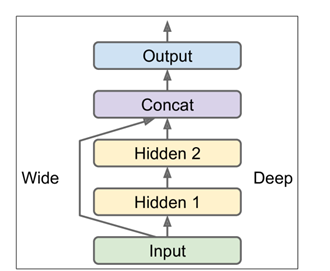

### Inputs
<b>Input transforms numpy array into tensors to be used by subsequent layers.</b><br><br>
<i>Input()</i> is used to instantiate a class that will perform the transformation to Keras tensor.
<u>Inputs is the shape of each object.</u> <br> In a tabular data, each row is an object. In Image data, each image is an object. So, in the former case, it is one dimensional and in the later case two-dimensional.  <br><br>
**Purpose**: *Purpose of Input is to tell the rest of the model as to what tensor object is to be expected by the rest of model*

```
tf.keras.Input(
    shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None,
    ragged=None, type_spec=None, **kwargs
)
```

## Design model
The model is created in lazy mode. Building a graph means building node of each graph. At this point no data is travelling through the graph.

In [9]:
# 3.1 Design model

# 3.1.1 Inputs to model. Note that inputs is NOT
#       a part of layers object
#       Input() is used to instantiate a Keras tensor.
#       This tensor will get populated when .fit() is
#       invoked and data starts flowing in.
#       Purpose: Define what tensor shape is to be expected
#                by the model

inputs = tf.keras.Input(
                         shape = X.shape[1:],
                         batch_size=None
                        )

type(inputs)

keras.src.engine.keras_tensor.KerasTensor

In [12]:
# 3.1.2 Examine the tensor object
print(inputs.dtype)
print(inputs.shape)
print(inputs.name)
inputs  # No data

<dtype: 'float32'>
(None, 8)
input_1


<KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'input_1')>

In [13]:
# 3.2 Add layers. Each layer outputs a tensor:

x = layers.Dense(100, activation = 'relu')(inputs)
x  # Does not return any array but a node

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_1')>

In [ ]:
# 3.2.1 Get nature of 'x'

print(type(x))
print(x.shape )  # (None, 100)

<class 'tensorflow.python.framework.ops.SymbolicTensor'>
(None, 100)


In [14]:
# 3.3 Add ome more layer:

x = layers.Dense(100, activation = 'relu')(x)
x  # Another node. It is the same as earlier node x

<KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'dense_2')>

In [15]:
# 3.3.1 Concatenate
x = tf.keras.layers.concatenate([x,inputs])
x


<KerasTensor: shape=(None, 108) dtype=float32 (created by layer 'concatenate')>

In [16]:
# 3.3.2 Final layer
out = layers.Dense(1,activation = 'sigmoid')(x)
out

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>

In [17]:
# 3.3.3 Create model now
model = Model(inputs = [inputs], outputs = [out])
model

In [18]:
# 3.4 Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 100)                  900       ['input_1[0][0]']             
                                                                                                  
 dense_2 (Dense)             (None, 100)                  10100     ['dense_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 108)                  0         ['dense_2[0][0]',             
                                                                     'input_1[0][0]']         

In [ ]:
# 3.5 `Model` groups layers into an object
#       with training and inference features.
help(Model)

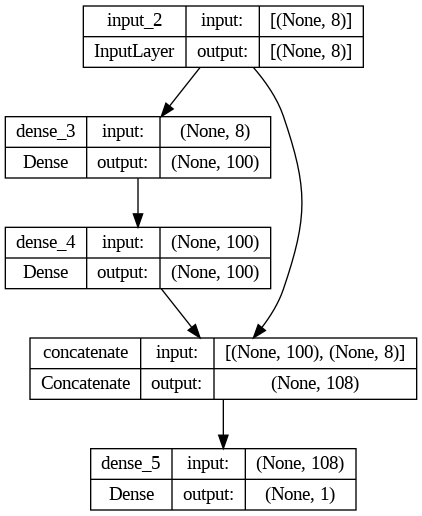

In [ ]:
# 3.6 Display model now
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model

plot_model(model, show_shapes= True)

In [19]:
# 3.7 Compile model
model.compile(loss = "mean_squared_error")

In [22]:
# 3.8
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (X_test, y_test)
                    )

Epoch 1/50
516/516 [==============================] - 2s 3ms/step - loss: 2.4736 - val_loss: 2.4266
Epoch 2/50
516/516 [==============================] - 1s 3ms/step - loss: 2.4736 - val_loss: 2.4266
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4736 - val_loss: 2.4265
Epoch 4/50
516/516 [==============================] - 1s 3ms/step - loss: 2.4735 - val_loss: 2.4274
Epoch 5/50
516/516 [==============================] - 1s 3ms/step - loss: 2.4736 - val_loss: 2.4267
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 2.4735 - val_loss: 2.4267
Epoch 7/50
516/516 [==============================] - 1s 3ms/step - loss: 2.4735 - val_loss: 2.4266
Epoch 8/50
516/516 [==============================] - 1s 3ms/step - loss: 2.4736 - val_loss: 2.4268
Epoch 9/50
516/516 [==============================] - 2s 4ms/step - loss: 2.4734 - val_loss: 2.4266
Epoch 10/50
516/516 [==============================] - 2s 3ms/step - loss: 2.4735 - val_loss: 2.4265

In [ ]:
# 3.8
model.evaluate(X_test,y_test)  # 2.56280517578125

129/129 [==============================] - 0s 1ms/step - loss: 2.4691


2.4691314697265625

## Wide and Deep Network--Convolution Network

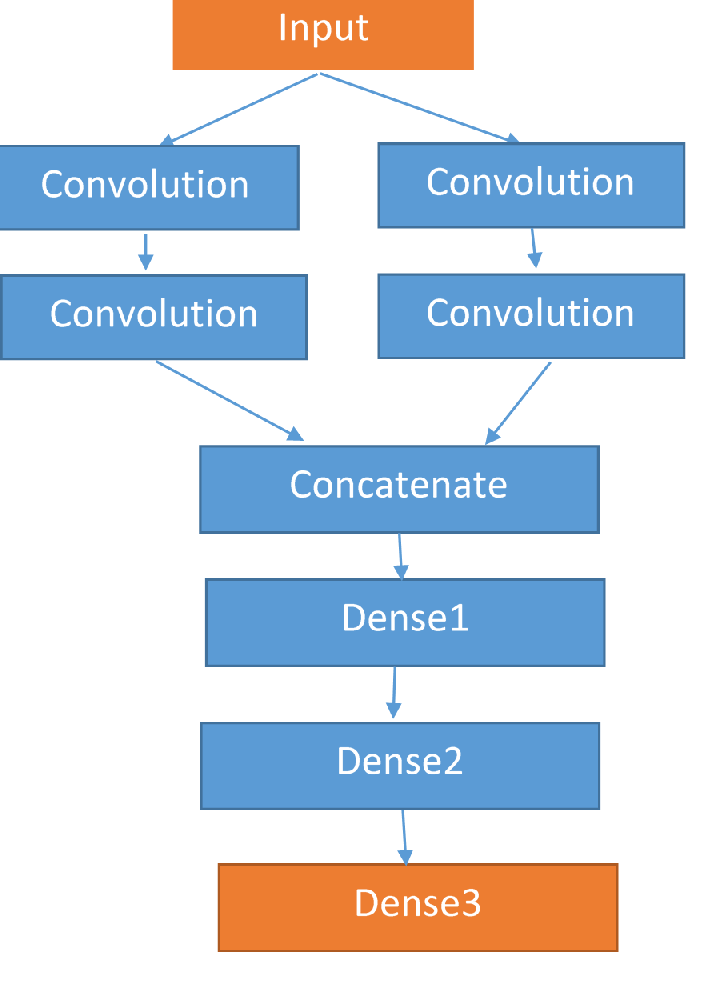

## Convolution layers--Refresher
Also refer [here](https://cs231n.github.io/convolutional-networks/) for animated **gif**   
Also see [here](https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/)

### How Conv2D works
Keywords:  Filter; receptive field; weights ; convolving ; element-wise multiplications ; activation map or feature maps

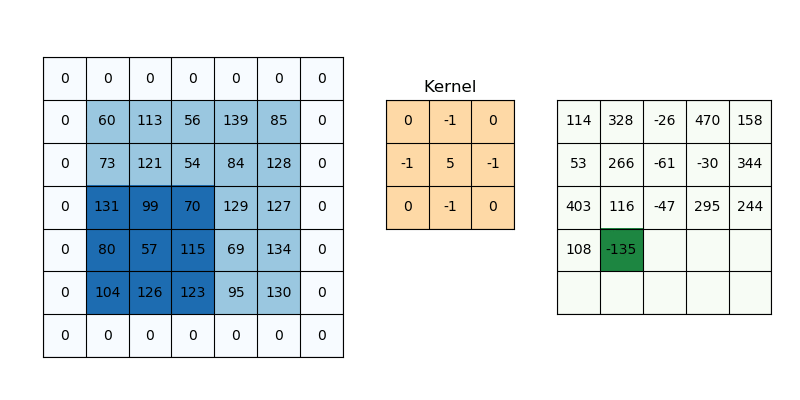

In [ ]:
# Check above
-99 -80 + 57 * 5 -115 -126

-135

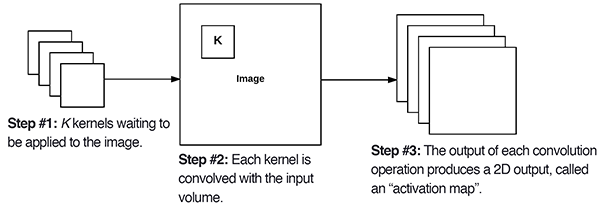

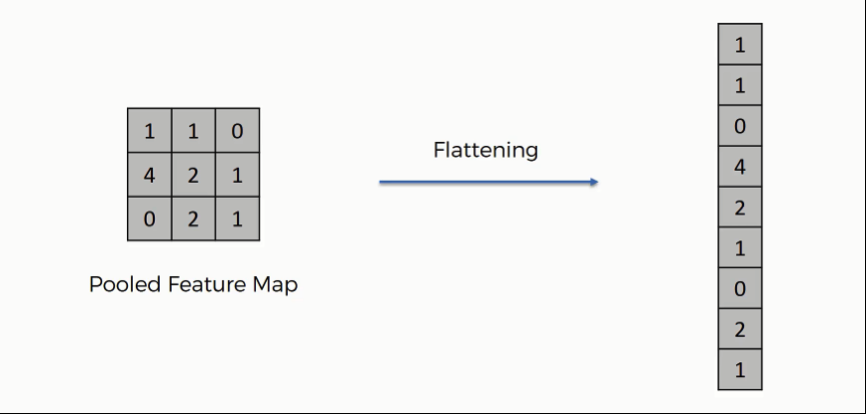

### How Conv1D works
Also see here for [dilation convolution](https://jinglescode.github.io/2020/11/01/how-convolutional-layers-work-deep-learning-neural-networks/)

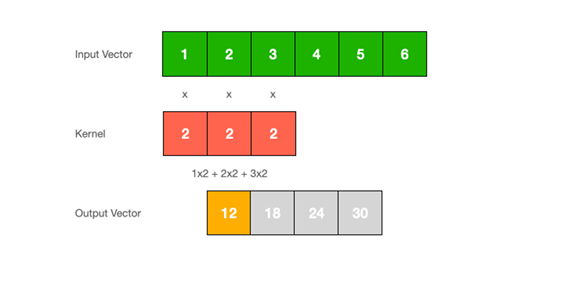

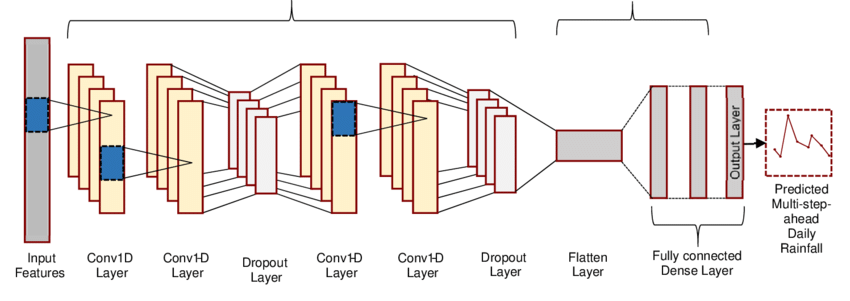

### Dilated convolution kernel

You may have noticed the term “dilated convolutions”. Dilated convolutions “inflate” the kernel by inserting spaces between the kernel elements, and a parameter controls the dilation rate. A dilation rate of 2 means there is a space between the kernel elements. Essentially, a convolution kernel with dilation = 1 corresponds to a regular convolution.

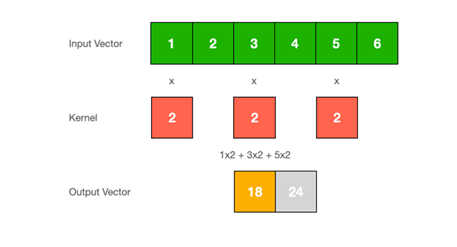

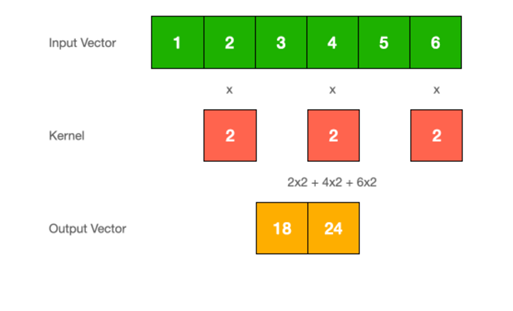

## Model now

In [23]:
X_train.shape[0]  # No of rows
print("\n=========\n")
X_train.shape[1]

16512

8

In [24]:
X_test.shape[0]  # 4128
print("\n=========\n")
X_test.shape[1] #

4128

8

In [25]:
# 4.1 Regarding train data
no_of_samples_tr = X_train.shape[0]             # No of rows: 16512
input_features = X_train.shape[1]               # No of features: 8
channels = 1
batch_size_tr = no_of_samples_tr                # Data being less, we will
                                                # use all samples in the batch

In [26]:
# 4.2 Regarding test data
no_of_samples_test = X_test.shape[0]           # 4128
input_features = X_test.shape[1]               # No of features. 8
channels = 1
batch_size_test = no_of_samples_test           # 4128

In [27]:
# 4.3 Reshape input train/test data as required by Keras for conv1D:

train = X_train.reshape((no_of_samples_tr,
                         input_features,
                         channels)
                        )

test  = X_test.reshape(( no_of_samples_test,
                        input_features,
                         channels)
                       )

In [28]:
# 4.4
train.shape   # (16512, 8, 1)
test.shape    # (4128, 8, 1)

(16512, 8, 1)

(4128, 8, 1)

In [29]:
 # 5.0 Design model

# 5.1 Inputs to model. Note that inputs is NOT
#       a part of layers object

inputs = tf.keras.Input(
                         shape = (train.shape[1:])   # (8,1)
                        )


In [30]:
# 5.2 Add convolution layers to left arm
x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

In [31]:
# 5.2.1
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [32]:
# 5.3 Add convolution layers to right arm

x_rt = layers.Conv1D(
                      filters = 64,
                      kernel_size=3,
                      activation='relu'
                    )(inputs)

# 5.3.1
x_rt = layers.Conv1D(
                      filters = 128,
                      kernel_size=3,
                      activation='relu'
                    )(x_rt)


In [33]:
# 5.4 Concatenate layers & Flatten:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [34]:
# 5.4.1
x = layers.Flatten()(x)

In [35]:
# 5.5 Add Dense (classification) layers

x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [36]:
# 5.6 Final layer & model:

out = layers.Dense(1,activation = 'sigmoid')(x)

In [37]:
# 5.7 Create model now
model1 = Model(inputs = [inputs], outputs = [out])

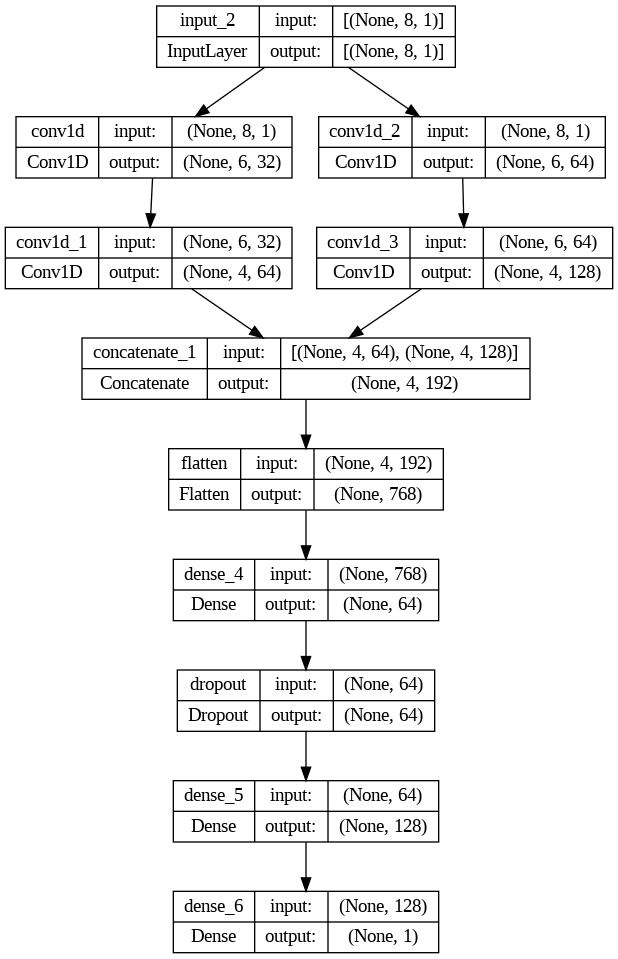

In [38]:
# 5.8 Display model now

plot_model(model1, show_shapes= True)

In [39]:
# 5.8 Compile model
model1.compile(
                 loss = "mean_squared_error",
                 optimizer='adam'
              )

In [40]:
# 5.8.1
history = model1.fit(
                    train,
                    y_train,
                    epochs = 50,
                    verbose = 1,
                    validation_data = (X_test, y_test)
                    )

Epoch 1/50
516/516 [==============================] - 5s 7ms/step - loss: 2.5004 - val_loss: 2.4349
Epoch 2/50
516/516 [==============================] - 4s 8ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 3/50
516/516 [==============================] - 3s 6ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 4/50
516/516 [==============================] - 3s 6ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 5/50
516/516 [==============================] - 4s 8ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 6/50
516/516 [==============================] - 4s 7ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 7/50
516/516 [==============================] - 3s 6ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 8/50
516/516 [==============================] - 3s 6ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 9/50
516/516 [==============================] - 4s 8ms/step - loss: 2.4830 - val_loss: 2.4349
Epoch 10/50
516/516 [==============================] - 3s 6ms/step - loss: 2.4830 - val_loss: 2.4349

In [41]:
# 5.9
model1.evaluate(test,y_test)

129/129 [==============================] - 1s 3ms/step - loss: 2.4349


2.4349441528320312

## Two inputs one output

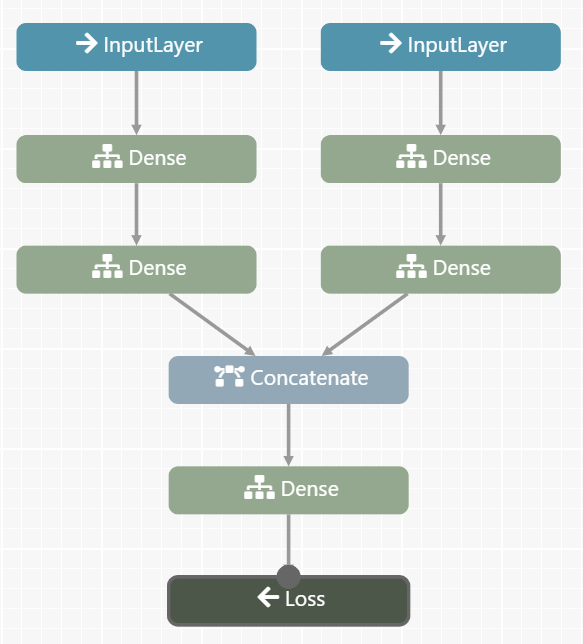

### Quick Code

**Steps**
```
# a. Define two inputs
data1 = X_train[:,:4].copy()
data2 = X_train[:,1:8].copy()

# b. Two inputs into network:
inputsA = tf.keras.Input(
                         shape = data1.shape[1] ,
                         name = "abc"
                         )
inputsB = tf.keras.Input(
                         shape = data2.shape[1],
                         name = "cde"
                         )

# c. Built two models as usual with each of two inputs
# d. Concatenate output tensor of two models
# e. Define your model
model = Model(inputs = [inputsA,inputsB], outputs = [out])
# f. Compile model
# g. Train the model now.
model.fit(

	          {
             "abc" : data1,
             "cde" : data2
            },
            y_train,
            epochs = 5
           )
```

In [ ]:
# 6.0 Two inputs
data1 = X_train[:,:4].copy()
data2 = X_train[:,1:8].copy()

# Define shapes of tensors getting into our models:
inputsA = tf.keras.Input(
                         shape = data1.shape[1] ,
                         name = "abc"
                         )
inputsB = tf.keras.Input(
                         shape = data2.shape[1],
                         name = "cde"
                         )

# 6.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 6.1.1 Other arm of network
y = layers.Dense(100, activation = 'relu')(inputsA)
y = layers.Dense(100,activation= 'relu')(y)

# 6.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,y])

# 6.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)

# 6.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])


# 6.5 Compile model
model2.compile(
               optimizer='rmsprop',
               loss = 'mean_squared_error'
               )

# 6.6 Train the model now.
#     We must have a way to match
#     our ORIGINAL InputsA and InputsB
#     with what is fed here:

model2.fit(

	          {
             "abc" : data1,
             "cde" : data2
            },
            y_train,
            epochs = 5
           )


### Line-by-line explanation

In [ ]:
# 6.0 We have two inputs
inputsA = tf.keras.Input(shape = X_train[:,:4].shape[1:])
inputsB = tf.keras.Input(shape = X_train[:,1:8].shape[1:])

In [ ]:
# 6.1 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)


In [ ]:
# 6.1.1 Other arm of network
y = layers.Dense(100, activation = 'relu')(inputsA)
y = layers.Dense(100,activation= 'relu')(y)


In [ ]:
# 6.2 Concatenate one input with output of another arm
concat = layers.concatenate([x,y])

In [ ]:
# 6.3 Output layer
out = layers.Dense(1,activation = 'sigmoid')(concat)


In [ ]:
# 6.4 Create model and show summary
model2 = Model(inputs = [inputsA,inputsB], outputs = [out])
model2.summary()

In [ ]:
# 6.5 Compile model
model2.compile(
               optimizer='rmsprop',
               loss = 'mean_squared_error'
               )

# 6.6 Train the model now.
#     Note the two train inputs
model2.fit(
            [X_train[:,:4], X_train[:,1:8]],
            y_train,
            epochs = 100
           )

In [ ]:
# 6.7
model2.evaluate( [X_test[:,:4], X_test[:,1:8]],y_test)

129/129 [==============================] - 0s 2ms/step - loss: 2.5633


2.563317060470581

In [ ]:
# 6.8 Plot our model
plot_model(model2)

## Two inputs and two outputs model
Can be skipped in the class

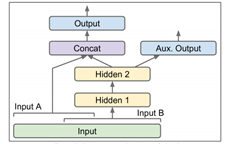

In [ ]:
# 7.0 We have two inputs.
#     To distiguish them, we give names to each
inputsA = tf.keras.Input(
                          shape = X_train[:,:4].shape[1:],
                          name = "in_a"
                         )

# 7.1
inputsB = tf.keras.Input(
                          shape = X_train[:,1:8].shape[1:],
                          name = "in_b"
                        )


# 7.2 One arm of network
x = layers.Dense(100, activation = 'relu')(inputsB)
x = layers.Dense(100,activation= 'relu')(x)

# 7.3 Concatenate an input with output of one arm
concat = layers.concatenate([x,inputsA])

# 7.4 Output layers
#     We have two output layers. To distiguish them, we give names to each
out_x = layers.Dense(1,activation = 'sigmoid' , name = "out_a")(concat)
out_y = layers.Dense(1,activation = 'sigmoid', name = "out_b")(x)

# 7.5 Create model and show summary
#     While outputs are two, model is one
main_model = Model(inputs = [inputsA,inputsB], outputs = [out_x, out_y])
main_model.summary()


In [ ]:
# 7.6 Plot the model now
plot_model(main_model, show_shapes = True)

In [ ]:
# 8.0 Compile model now
# Ref: Model.compile:
#      https://wwwa.tensorflow.org/api_docs/python/tf/keras/Model

main_model.compile(
                     loss = ['mse', 'mse'],        # Could also be in dict() format
                     metrics = "mse",
                     loss_weights= {"out_a": 0.9,   # More weight to error here
                                    "out_b" : 0.1   # Less weight to error here
                                    }
                   )

In [ ]:
# 8.1
main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input
               },
               [y_train,y_train],
               epochs = 100
           )

In [ ]:
# 8.2 One can also write outputs in a dictionary form, as:

main_model.fit(
               {                            #[X_train[:,:4],X_train[:,1:8]]
                   "in_a" : X_train[:,:4],  # One input
                   "in_b" : X_train[:,1:8]  # IInd input
               },
               {
                   "out_a" : y_train,
                   "out_b" : y_train
               },
               epochs = 100
           )

In [ ]:
# 8.3 To evaluate, we must also supply two inputs
main_model.evaluate(
                     [X_test[:,:4],X_test[:,1:8]],
                      y_test
                    )

129/129 [==============================] - 0s 1ms/step - loss: 2.5633 - out_a_loss: 2.5632 - out_b_loss: 2.5639 - out_a_mse: 2.5632 - out_b_mse: 2.5639


[2.5633063316345215,
 2.563241958618164,
 2.563885450363159,
 2.563241958618164,
 2.563885450363159]

In [ ]:
########### It is done ##############